# Load Packages

In [1468]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load Data Points (Do not modify the following block)

We have 15 number of data
Coefficients of the original polynomial
w0:-0.467  w1:-0.005  w2:0.281  w3:-0.054  


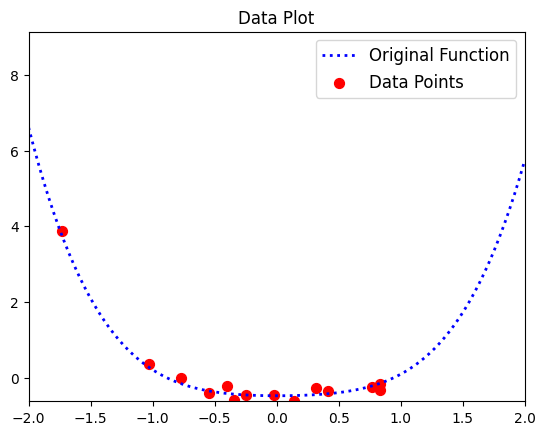

In [1469]:
with open('training_data.npz', 'rb') as f:
    data = np.load(f)

    x_list = data['x_list']
    y_list = data['y_list']

    x_data = data['x_data']
    y_data = data['y_data']
    n_data = len(x_data)
    
    w = data['w']
    original_degree = data['order']
    
# Print information of original function.
print("=================================")
print("We have", n_data, "number of data")

print("=================================")
weight_info_string = ''
for d in range(original_degree):
    weight_info_string += 'w'+str(d)+':'+str(round(w[d],ndigits=3))+'  '
print("Coefficients of the original polynomial")
print(weight_info_string)
print("=================================")
    
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

# Polynomial Regression (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'w' is true coefficients of the original polynomial function
- 'original_degree' is the order of the original polynomial function
- 'x_list' is a list of the points at $x$-axis
- 'y_list' is a list of function value $f(x)$ corresponding to 'x_list'. In other words, y_list = $f($x_list$)$
- 'x_data' is an input data
- 'y_data' is an output data
- 'n_data' is the number of data points

### Our goal is to estimate 'w' from data points, 'x_data' and 'y_data'. Answer the following problems.

### 1. Compute a Vandermonde matrix when the degree of polynomial is $4$ (30pt)
- The variable 'degree' is the order of polynomial. In this problem, we set degree=$4$
- Use the variable 'A' for the Vandermonde matrix. Now, 'A' is initialized as a zero matrix whose elements are all zero. Fill in the element of the Vandermonde matrix by using power operator (\*\*), for loop, and np.concatenation.

In [1470]:
degree = 4
np.set_printoptions(suppress=True)
A = np.zeros((n_data, degree+1))

for i in range(n_data):
    for j in range(degree+1):
        A[i, j] = i+1
        
A = np.split(A, n_data)

for l in range(0, n_data, 1):
    for k in range(0, degree+1, 1):
        A[l][0, k] **= k

A = np.concatenate((A[0], A[1], A[2], A[3], A[4], A[5], A[6], A[7], A[8], A[9], A[10], A[11], A[12], A[13], A[14]))

#print(n_data) 15
#print(degree) 4

### Print results (do not modify the following block)

In [1471]:
print(A)

[[    1.     1.     1.     1.     1.]
 [    1.     2.     4.     8.    16.]
 [    1.     3.     9.    27.    81.]
 [    1.     4.    16.    64.   256.]
 [    1.     5.    25.   125.   625.]
 [    1.     6.    36.   216.  1296.]
 [    1.     7.    49.   343.  2401.]
 [    1.     8.    64.   512.  4096.]
 [    1.     9.    81.   729.  6561.]
 [    1.    10.   100.  1000. 10000.]
 [    1.    11.   121.  1331. 14641.]
 [    1.    12.   144.  1728. 20736.]
 [    1.    13.   169.  2197. 28561.]
 [    1.    14.   196.  2744. 38416.]
 [    1.    15.   225.  3375. 50625.]]


### 2. Compute the coefficients of polynomial regression using a $4$ degree polynomial  (40pt)
- Use the variable 'degree' and the Vandermonde matrix 'A' in Problem 1.
- The variable 'w_est' is the coefficients of polynomial regression. Now, 'w_est' is initialized as a zero vector. Compute the 'w_est' from 'A' and 'y'
- The variable 'y_est' is an estimated function value corresponding to the input points 'x_list'. Now, it is a zero list and fill the list by computing the estimated function values. In other words, y_est = $\hat{f}($x_list$)$

In [1472]:
w_est = np.zeros((degree+1,1))
y_est = np.zeros_like(x_list)
np.set_printoptions(suppress=True)

w_est = np.linalg.matrix_power(np.transpose(A) @ A, -1) @ np.transpose(A) @ y_data

for i in range(len(x_list)):
    for j in range(degree):
        if j == 0:
            y_est[i] += w_est[j]
        else:
            y_est[i] += w_est[j]*pow(x_list[i], j)


### Print results (do not modify the following block)

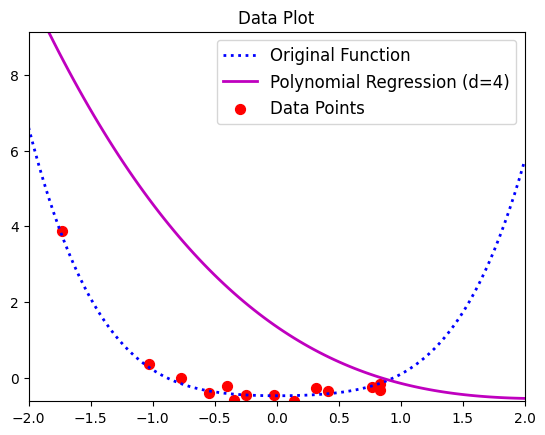

In [1473]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 3. Compute the polynomial regression with $1$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $1$.
- Use the following variables.
> degree1, A1, w_est1, y_est1

In [1474]:
degree1 = 1
np.set_printoptions(suppress=True)
A1 = np.zeros((n_data, degree1+1))
w_est1 = np.zeros((degree1+1,1))
y_est1 = np.zeros_like(x_list)

for i in range(n_data):
    for j in range(degree1+1):
        A1[i, j] = i+1

for l in range(0, n_data, 1):
    for k in range(0, degree1+1, 1):
        A1[l, k] **= k

w_est1 = np.linalg.matrix_power(np.transpose(A1) @ A1, -1) @ np.transpose(A1) @ y_data

for i in range(len(x_list)):
    for j in range(degree1+1):
        if j == 0:
            y_est1[i] += w_est1[j]
        else:
            y_est1[i] += w_est1[j]*pow(x_list[i], j)

### Print results (do not modify the following block)

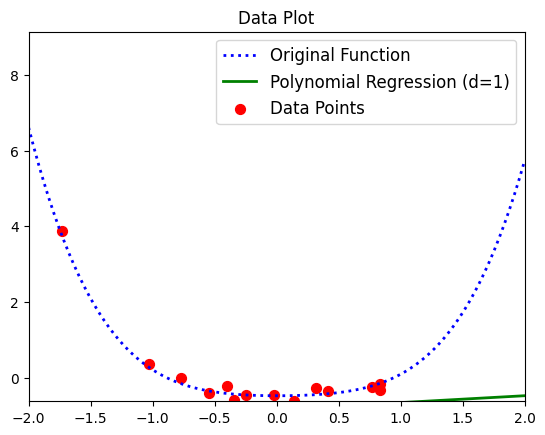

In [1475]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(degree1))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 4. Compute the polynomial regression with $10$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $10$.
- Use the following variables.
> degree2, A2, w_est2, y_est2

In [1476]:
degree2 = 10
A2 = np.zeros((n_data, degree2+1))
w_est2 = np.zeros((degree2+1,1))
y_est2 = np.zeros_like(x_list)

for i in range(n_data):
    for j in range(degree2+1):
        A2[i, j] = i+1

for l in range(0, n_data, 1):
    for k in range(0, degree2+1, 1):
        A2[l, k] **= k
        
w_est2 = np.linalg.matrix_power(np.transpose(A2) @ A2, -1) @ np.transpose(A2) @ y_data

for i in range(len(x_list)):
    for j in range(degree2):
            y_est2[i] += w_est2[j]*pow(x_list[i], j)

### Print results (do not modify the following block)

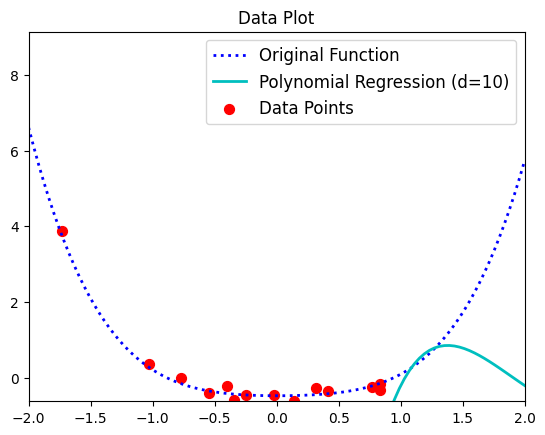

In [1477]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(degree2))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 5. [Challenging Problem] Explain the effect of degree (20pt)
- By solving the above problems, we can observe the behaviors of polynomial regression with different degrees (1, 4, 10)
- Explain pros and cons of high degree polynomial
- Explain pros and cons of low degree polynomial
- What is this phenomenon called in machine learning?

### The following figure shows all regression results with different degrees.

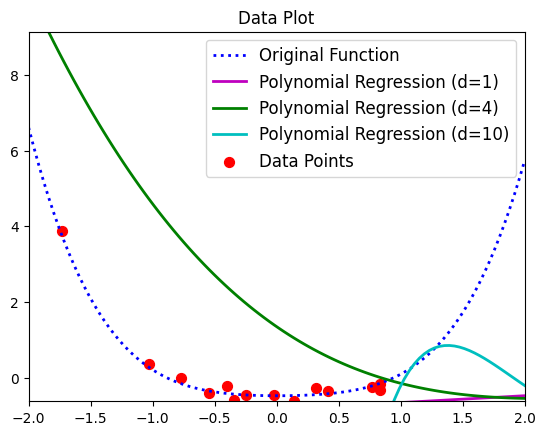

In [1478]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(1))
plt.plot(x_list, y_est, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(4))
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(10))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

Write your answer!!!